In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Ising_model:

    kb = 1  #1.38064852e-23

    def __init__(self, L, T):
        self.L = L
        self.T = T
        spin_conf = np.zeros((L, L))
        for i in range(L):
            for j in range(L):
                spin = np.random.randint(-1, 2)
                while spin == 0:
                    spin = np.random.randint(-1, 2)
                spin_conf[i][j] = spin
        self.s = spin_conf

    def visual(self, verbose=True):
        L = self.L
        demo = np.zeros(np.shape(self.s), dtype=str)
        num_up, num_down = 0, 0
        for i in range(L):
            for j in range(L):
                if self.s[i][j] == 1.0:
                    demo[i][j] = '↑'
                    num_up += 1
                elif self.s[i][j] == -1.0:
                    demo[i][j] = '↓'
                    num_down += 1
        print(demo)
        if verbose == True:
            print('Spin_up=%i ;Spin_down=%i' % (num_up, num_down))

    def energy(self):
        L = self.L
        E = 0
        J = 1
        for i in range(L):
            for j in range(L):
                E += self.s[i, j] * (self.s[
                    (i + 1) % L, j] + self.s[i, (j + 1) % L])
        energy = -J * E
        return energy

    def magnet(self):
        L = self.L
        M = 0.0
        for i in range(L):
            for j in range(L):
                M += self.s[i, j]
        return M

    def dE(self, i, j):
        L = self.L
        NB = self.s[(i + 1) % L, j] + self.s[i, (j + 1) % L] + self.s[
            (i - 1) % L, j] + self.s[i, (j - 1) % L]
        dE = 2 * self.s[i, j] * NB
        return dE

    def mc_method_sq(self, verbose1=False, verbose2=False):
        T = self.T
        kb = self.kb
        L = self.L
        accept = 0
        beta = 1 / T / kb
        for i in range(L):
            for j in range(L):
                if self.dE(i, j) < 0:
                    self.s[i][j] *= -1
                    accept += 1
                elif self.dE(i, j) >= 0:
                    prob = np.exp(-beta * self.dE(i, j))
                    if np.random.random() < prob:
                        self.s[i][j] *= -1
                        accept += 1
                if verbose1 == True:
                    print('\n[%i, %i], dE=%.1f' % (i, j, self.dE(i, j)))
                    self.visual()
        if verbose2 == True:
            print('L=%i, T=%i, Accept_rate=%.2f' % (L, T,
                                                    (100 * accept / L**2)) +
                  '%')
        return self.s

    def mc_method_rnd(self, verbose1=False, verbose2=False):
        T = self.T
        kb = self.kb
        L = self.L
        accept = 0
        beta = 1 / T / kb
        for n in range(L*L):
            i = np.random.randint(L)
            j = np.random.randint(L)
            if self.dE(i, j) < 0:
                self.s[i][j] *= -1
                accept += 1
            elif self.dE(i, j) >= 0:
                prob = np.exp(-beta * self.dE(i, j))
                if np.random.random() < prob:
                    self.s[i][j] *= -1
                    accept += 1
            if verbose1 == True:
                print('\n[%i, %i], dE=%.1f' % (i, j, self.dE(i, j)))
                self.visual()
        if verbose2 == True:
            print('L=%i, T=%i, Accept_rate=%.2f' % (L, T,
                                                    (100 * accept / L**2)) +
                  '%')
        return self.s
    
    @staticmethod
    def get_diff_T_params(L, T_list, N_rnd, plot=True, polarized=True):
        '''
        input: L, T_list (diff T), N_rnd
        output: C, Chi, Eng, Mag 
        '''
        Mag, Eng, C, Chi = [], [], [], []
        for T in T_list:
            sample = Ising_model(L, T)
            if polarized == True:
                sample.s = np.ones((sample.L, sample.L))
            
            mag, eng, mag_2, eng_2 = [], [], [], []
            for run in range(N_rnd):
                sample.mc_method_sq()
                mag.append(abs(sample.magnet()))
                eng.append(sample.energy())
                mag_2.append(sample.magnet()**2)
                eng_2.append(sample.energy()**2)

            mean_mag = sum(mag) / len(mag)
            mean_eng = sum(eng) / len(eng)
            mean_mag_2 = sum(mag_2) / len(mag_2)
            mean_eng_2 = sum(eng_2) / len(eng_2)

            C.append(((mean_eng_2 - mean_eng**2) / sample.kb / T / T) / (sample.L**2))
            Chi.append(((mean_mag_2 - mean_mag**2) / sample.kb / T) / (sample.L**2))
            Eng.append(mean_eng / sample.L**2)
            Mag.append(mean_mag / sample.L**2)
            
        if plot == True:
            axes[0, 0].plot(T_list, Eng, '-o', label=('L=%i' % L))
            axes[0, 1].plot(T_list, C, '-o', label=('L=%i' % L))
            axes[1, 0].plot(T_list, Mag, '-o', label=('L=%i' % L))
            axes[1, 1].plot(T_list, Chi, '-o', label=('L=%i' % L))
        
        return C, Chi, Eng, Mag

L=2
L=4
L=6
L=8


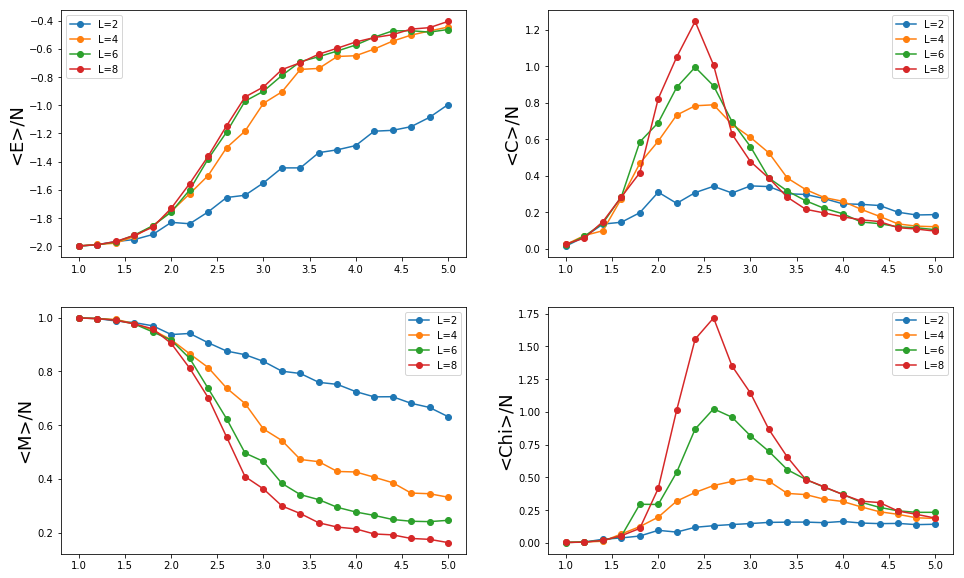

In [4]:
L_list = list(np.arange(2, 10, 2))
T_list = list(np.arange(1, 5.2, 0.2))
N_rnd = 1000

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
for L in L_list:
    print('L=%i' % L)
    Ising_model.get_diff_T_params(L, T_list, N_rnd)
    
axes[0, 0].legend(); axes[0, 1].legend()
axes[1, 0].legend(); axes[1, 1].legend()
axes[0, 0].set_ylabel('<E>/N', fontsize=18)
axes[0, 1].set_ylabel('<C>/N', fontsize=18)
axes[1, 0].set_ylabel('<M>/N', fontsize=18)
axes[1, 1].set_ylabel('<Chi>/N', fontsize=18)
plt.show()